This code is to analyze the income data, and to classify the income group using the SVC and LogisticRegression models. For each model, a five fold cross-validation is performed, and their scores are reported. Also presented is a confusion matrix and classification report.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.model_selection import train_test_split


In [2]:
# read data from file and convert it to numpy array
input_file = 'income_data.txt'
X,y = [],[]

with open(input_file,'r') as f:
    lines = f.readlines()
    for line in lines:
        if '?' in line:
            continue
        data = line[:-1].split(', ') # last character is a newline char '\n', so skip that. hence the line[:-1]
        # print(data)
        X.append(data)


X_data = []
for x in X[:len(X)-1]:
    X_data.append(x)

X_data = np.array(X_data)
print(X_data.shape)

(30162, 15)


In [3]:
# encode the strings to numeric data. if some data is numeric, leave it alone, else encode it. 
label_encoder = [] 
X_encoded = np.empty(X_data.shape)
for i,item in enumerate(X_data[0]):
    if item.isdigit(): 
        X_encoded[:, i] = X_data[:, i]
    else:
        label_encoder.append(LabelEncoder())
        X_encoded[:, i] = label_encoder[-1].fit_transform(X_data[:, i])

XX = X_encoded[:, :-1].astype(int) #these are the data to train the algorithm, leave out the last column for predictors
yy = X_encoded[:, -1].astype(int) #keep the last column for the target

In [5]:
# split data into training and testing set, and train the GaussianNB classifier
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42)
classifier = OneVsOneClassifier(LinearSVC(random_state=13, dual=False))
print(classifier)
classifier.fit(X_train, y_train)
y_test_pred = classifier.predict(X_test)

OneVsOneClassifier(estimator=LinearSVC(dual=False, random_state=13))


In [6]:
print(classifier.score(X_train, y_train))
print(classifier.score(X_test, y_test))

0.797380745161424
0.7984419028675618


In [7]:
# perform 5 fold cross-validation for the accuracy
from sklearn.model_selection import cross_val_score
print("CV Accuracy:")
cvscores = cross_val_score(classifier,XX,yy,scoring='accuracy', cv=5)
print(cvscores, cvscores.mean())
f1 = cross_val_score(classifier, XX, yy, scoring='f1_weighted', cv=5)
print ("F1 score: " + str(round(100*f1.mean(), 2)) + "%")


CV Accuracy:
[0.79197746 0.79711586 0.8030504  0.7936008  0.8002321 ] 0.7971953218395201
F1 score: 76.07%


In [20]:
from sklearn.metrics import confusion_matrix
# print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)
print(confusion_matrix(y_test, y_test_pred).ravel()) #this will print true negative, false positive, false negative, true positive

from sklearn.metrics import classification_report
target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_test_pred, target_names = target_names))

[[4405   98]
 [1118  412]]
[4405   98 1118  412]
              precision    recall  f1-score   support

       <=50K       0.80      0.98      0.88      4503
        >50K       0.81      0.27      0.40      1530

    accuracy                           0.80      6033
   macro avg       0.80      0.62      0.64      6033
weighted avg       0.80      0.80      0.76      6033



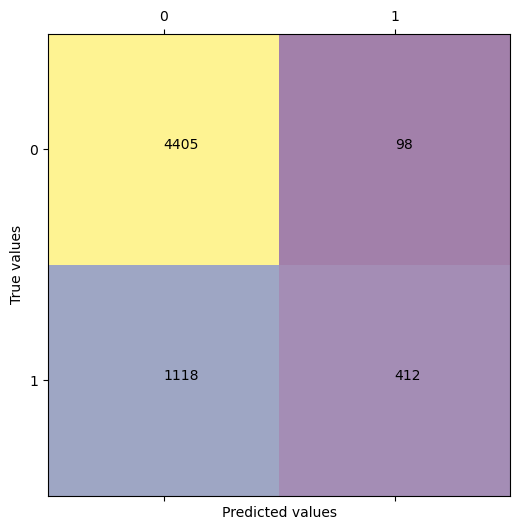

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, alpha = 0.5)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j,i, cm[i,j])
ax.set_xlabel("Predicted values")
ax.set_ylabel("True values")
plt.show()

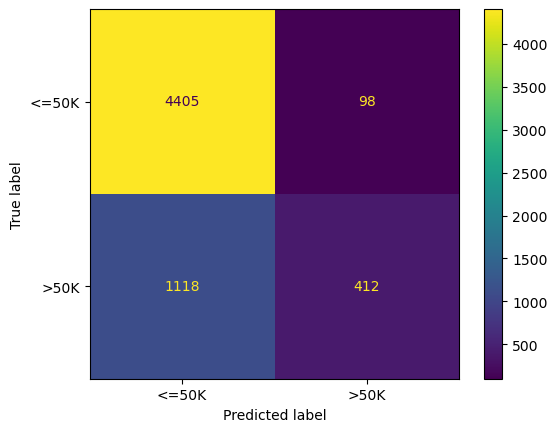

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
cmp = ConfusionMatrixDisplay(cm,display_labels=['<=50K','>50K'])
cmp.plot()

In [37]:
# test the model on a single observation
input_data = ['39', 'State-gov', '77516', 'Masters', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40', 'United-States'] 
count = 0
input_data_encoded = [-1] * len(input_data)

for i,item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count = count + 1 

input_data_encoded = np.array(input_data_encoded)
print(input_data_encoded)

input_data_encoded = np.array(input_data_encoded).reshape(1,-1) # as our sample has one row, need to reshape it so it is compatible to predict function
# Predict and print output for a particular datapoint
output_class = classifier.predict(input_data_encoded)
print ("Predicted: ", label_encoder[-1].inverse_transform(output_class)[0])


[   39     5 77516    12    13     4     0     1     4     1  2174     0
    40    38]
Predicted:  <=50K


In [42]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter = 1000)
print(clf_lr)
clf_lr.fit(X_train, y_train)
y_test_pred = clf_lr.predict(X_test)

LogisticRegression(max_iter=1000)


In [43]:
print(clf_lr.score(X_train, y_train))
print(clf_lr.score(X_test, y_test))

0.7934435741224253
0.792971987402619


In [45]:
print("CV Accuracy:")
cvscores = cross_val_score(clf_lr,XX,yy,scoring='accuracy', cv=5)
print(cvscores, cvscores.mean())
f1 = cross_val_score(clf_lr, XX, yy, scoring='f1_weighted', cv=5)
print ("F1 score: " + str(round(100*f1.mean(), 2)) + "%")

CV Accuracy:
[0.78551301 0.79612133 0.79476127 0.79094828 0.78746684] 0.7909621474023727
F1 score: 75.89%


In [47]:
print(confusion_matrix(y_true=y_test, y_pred=y_test_pred))

print(confusion_matrix(y_test, y_test_pred).ravel()) #this will print true negative, false positive, false negative, true positive

# from sklearn.metrics import classification_report

target_names = ['<=50K', '>50K']
print(classification_report(y_test, y_test_pred, target_names = target_names))

[[4363  140]
 [1109  421]]
[4363  140 1109  421]
              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.87      4503
        >50K       0.75      0.28      0.40      1530

    accuracy                           0.79      6033
   macro avg       0.77      0.62      0.64      6033
weighted avg       0.79      0.79      0.76      6033



In [54]:
# test the model on a single observation
input_data = ['74', 'State-gov', '77516', 'Masters', '13', 'Never-married', 'Adm-clerical', 'Not-in-family', 'White', 'Female', '2174', '0', '40', 'United-States'] 
count = 0
input_data_encoded = [-1] * len(input_data)

for i,item in enumerate(input_data):
    if item.isdigit():
        input_data_encoded[i] = int(input_data[i])
    else:
        input_data_encoded[i] = int(label_encoder[count].transform([input_data[i]]))
        count = count + 1 

input_data_encoded = np.array(input_data_encoded)
print(input_data_encoded)

input_data_encoded = np.array(input_data_encoded).reshape(1,-1) # as our sample has one row, need to reshape it so it is compatible to predict function
# Predict and print output for a particular datapoint
output_class = classifier.predict(input_data_encoded)
print ("Predicted: ", label_encoder[-1].inverse_transform(output_class)[0])


[   74     5 77516    12    13     4     0     1     4     0  2174     0
    40    38]
Predicted:  <=50K
